# Notebook 3 - Classic Option Pricing (Black-Scholes Theory)

In questa lezione si effettua una simulazione di <b> econofisica </b> riguardante la teoria di Black-Scholes sull'Option Pricing.

   - [  3.1 - Procedimento Diretto  ](#ex-3.1) 
       
   - [  3.2 - Procedimento Discretizzato  ](#ex-3.1.2) 
   
   

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## European Option Pricing

In finanza è detta opzione un particolare tipo di contratto tra un venditore (<b> writer </b>) e un compratore (<b> holder </b>), nel quale il writer assume un onere, mentre l'holder, a fronte di un prezzo pagato non recuperabile, assume un diritto. <br>
L'opzione più semplice è quella europea, che si fonda su un <i> asset </i> (ovvero un oggetto, tipicamente azioni o tassi di interesse). In questa opzione l'holder assume il diritto di comprare, o di vendere, l'asset ad un prezzo prestabilito $K$ e dopo un tempo prestabiliuto $T$, che costituisce la scadenza dell'opzione. Alla scadenza del contratto, l'holder ha quindi due possibilità di profitto:
- Comprare l'asset (<i> Call Option </i> ), se in quel momento il prezzo di mercato $S(t)$ dell'azione è maggiore di $K$. In questo caso il profitto è $S(T) - K$
- Vendere l'asset (<i> Pull Option </i> ), se in quel momento il prezzo di mercato $S(t)$ dell'azione è minore di $K$. In questo caso il profitto è $K - S(T)$

La teoria di Black-Scholes cerca di risolvere la questione di quanto dovrebbe costare un'opzione, nel caso di opzioni europee.

## Teoria di Black-Scholes

La teoria di Black-Scholes si basa su delle assunzioni di base. Il mercato deve essere <b> massimalmente efficiente </b> ovvero 

1. <b> Liquido </b>, ovvero ogni investitore può facilmente comprare o vendere asset.
2. <b> Privo di attriti </b>, ovvero non ci sono costi legati alle transazioni (tasse).

Sotto queste assunzioni, la teoria di Black-Scholes esprime l'evoluzione del prezzo di un asset $S(t)$ con un andamento stocastico tipico di un moto Browniano geometrico:

\begin{equation}
    S(t) = S(0) \left( \mu - \frac{1}{2}\sigma^2 \right)dt + \sigma W(t)
\end{equation}

Dove $\left( \mu - \frac{1}{2}\sigma^2 \right)dt$ rappresenta il contributo <b> deterministico </b> dell'evoluzione temporale, dipendente dal parametro $\mu$ che esprime la crescita media del prezzo dell'asset.
Invece $\sigma W(t)$ rappresenta il contributo <b> stocastico </b>, il parametro $\sigma$ è detto volatilità e parametrizza l'importanza delle fluttuazioni di prezzo. Il termine $W(t)$ esprime il fatto che il processo sia <b> Markoviano </b>, ovvero non dipendente dalla storia pregressa del sistema. <br>
Il fatto che gli incrementi $dW(t)$ siano indipendenti e $W(t) \sim N(0,t)$ fornisce una procedura per simularne l'evoluzione temporale sia in modo diretto che campionando per intervalli discreti. <br>
L'obiettivo dell'esercizio è calcolare il prezzo ideale delle opzioni call e put, simulando l'andamento di $S(t)$ secondo la teoria di Black-Scholes. <br>
Questo verrà fatto simulando l'evoluzione del profitto nelle due opzione, includendo anche un termine $\exp(-rT)$ che esprima la diminuzione di profitto dovuta agli interessi da restituire alla banca che inizialmente fornisce i soldi per l'acquisto dell'opzione. <br>
Dunque il prezzo ideale sarà, dopo aver calcolato il prezzo finale dell'asset:
\begin{equation}
    C[S(0), 0] = e^{-rT} \max(0, S(T)-K)
\end{equation}
\begin{equation}
    [S(0), 0] = e^{-rT} \max(0, K - S(T))
\end{equation}
Dato che la teoria di Black-Scholes ha anche una soluzione analitica, i risultati corrispondenti ai nostri dati iniziali verranno confrontati con quelli forniti di:
- $C[S(0), 0] = 14.97579$
- $P[S(0), 0] = 5.4595$

<a id="ex-3.1"></a>
## Esercizio 3.1 - Procedimento Diretto
Il procedimento diretto consiste nello sfruttare la dipendenza $W(t) \sim N(0,t)$ per estrarre direttamente in maniera Gaussiana il prezzo finale dell'asset. I dati iniziali utilizzati sono stati:
- $S(0) = 0$
- $T = 1$
- $K = 100$
- $r = 0.1$
- $\sigma = 0.25$

Si è inoltre utilizzato il metodo di data blocking.

Call Option
L'ultimo valore calcolato è 14.9914
Il relativo errore è 0.0615667
Il valore si trova a 0.3σ dal valore atteso di 14.97579
Pull Option
L'ultimo valore calcolato è 5.48786
Il relativo errore è 0.0272551
Il valore si trova a 1.0σ dal valore atteso di 5.4595


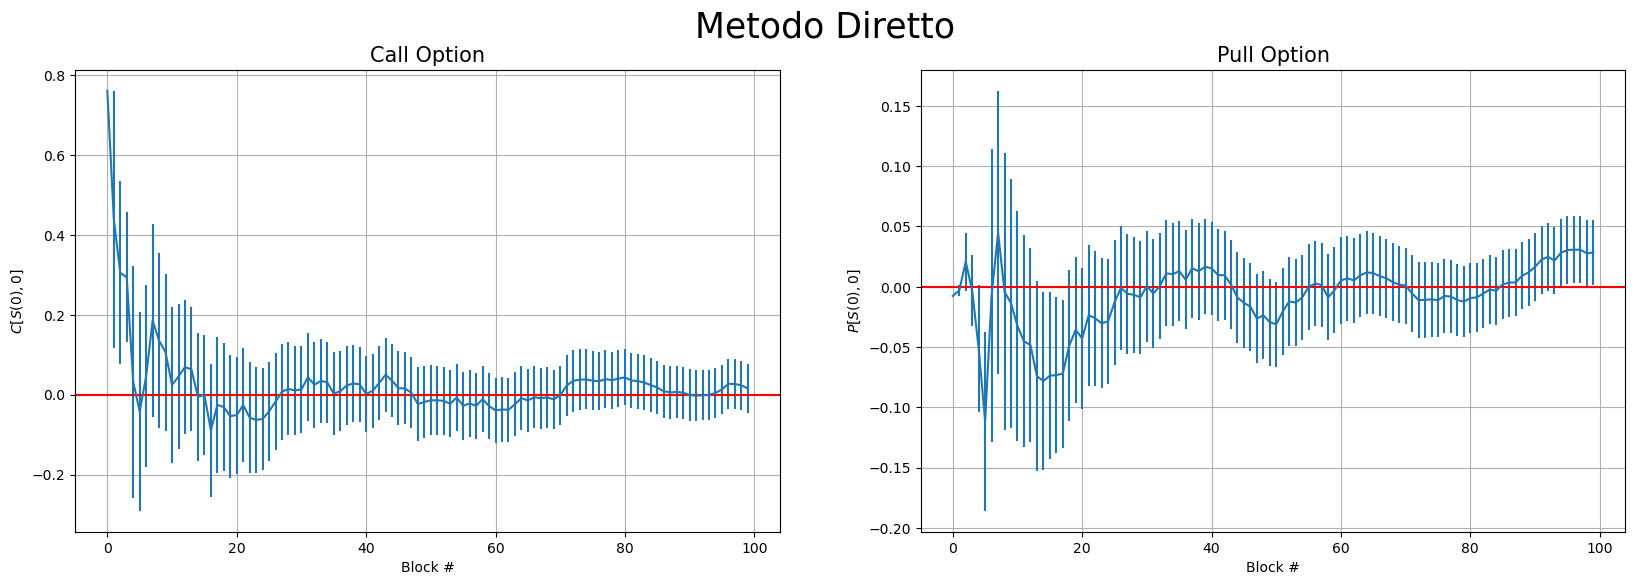

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.suptitle("Metodo Diretto", fontsize = 25)

x, sum_prog, err_prog = np.loadtxt("Exercise03-1/results/results_call_onestep.txt", usecols =(0,1,2), unpack = 'true')
axes[0].errorbar(x, sum_prog-14.97579, yerr = err_prog)
axes[0].set_xlabel('Block #')
axes[0].set_ylabel(r'$C[S(0),0]$')
axes[0].set_title("Call Option", fontsize=15)
axes[0].grid(True)
axes[0].axhline(y=0, color = 'r', linestyle = '-')

print("\033[1m" + "Call Option" + "\033[0m")
print("L'ultimo valore calcolato è " + str(sum_prog[-1])) 
print("Il relativo errore è " + str(err_prog[-1]))
sigma = (sum_prog[-1] - 14.97579)/err_prog[-1]
print("Il valore si trova a " + str(round(sigma,1)) + "\u03C3 dal valore atteso di 14.97579")

x, sum_prog, err_prog = np.loadtxt("Exercise03-1/results/results_pull_onestep.txt", usecols =(0,1,2), unpack = 'true')
axes[1].errorbar(x, sum_prog-5.4595, yerr = err_prog)
axes[1].set_xlabel('Block #')
axes[1].set_ylabel(r'$P[S(0),0]$')
axes[1].set_title("Pull Option", fontsize=15)
axes[1].grid(True)
axes[1].axhline(y=0, color = 'r', linestyle = '-')
plt.plot()

print("\033[1m" + "Pull Option" + "\033[0m")
print("L'ultimo valore calcolato è " + str(sum_prog[-1])) 
print("Il relativo errore è " + str(err_prog[-1]))
sigma = (sum_prog[-1] - 5.4595)/err_prog[-1]
print("Il valore si trova a " + str(round(sigma,1)) + "\u03C3 dal valore atteso di 5.4595")

<a id="ex-3.2"></a>
## Esercizio 2.1 - Procedimento Discretizzato
Il procedimento discretizzato consiste nel campionare il prezzo a tempi discreti $S(t_1), S(t_2), S(t_3)...$ sfruttando il fatto che gli incrementi $dW(t_{i+1}) - dW(t) \sim Z_{i+1} \sqrt{t_{i+1}} + t_i$, dove $Z_i \sim N(t_{i-1}, t_i)$ sono estratti gaussianamente. <br>
Sono stati utilizzati gli stessi parametri del precedente esercizio e il metodo di data blocking

Call Option
L'ultimo valore calcolato è 14.7678
Il relativo errore è 0.0697128
Il valore si trova a 3.0σ dal valore atteso di 14.97579
Pull Option
L'ultimo valore calcolato è 5.44685
Il relativo errore è 0.028152
Il valore si trova a 0.4σ dal valore atteso di 5.4595


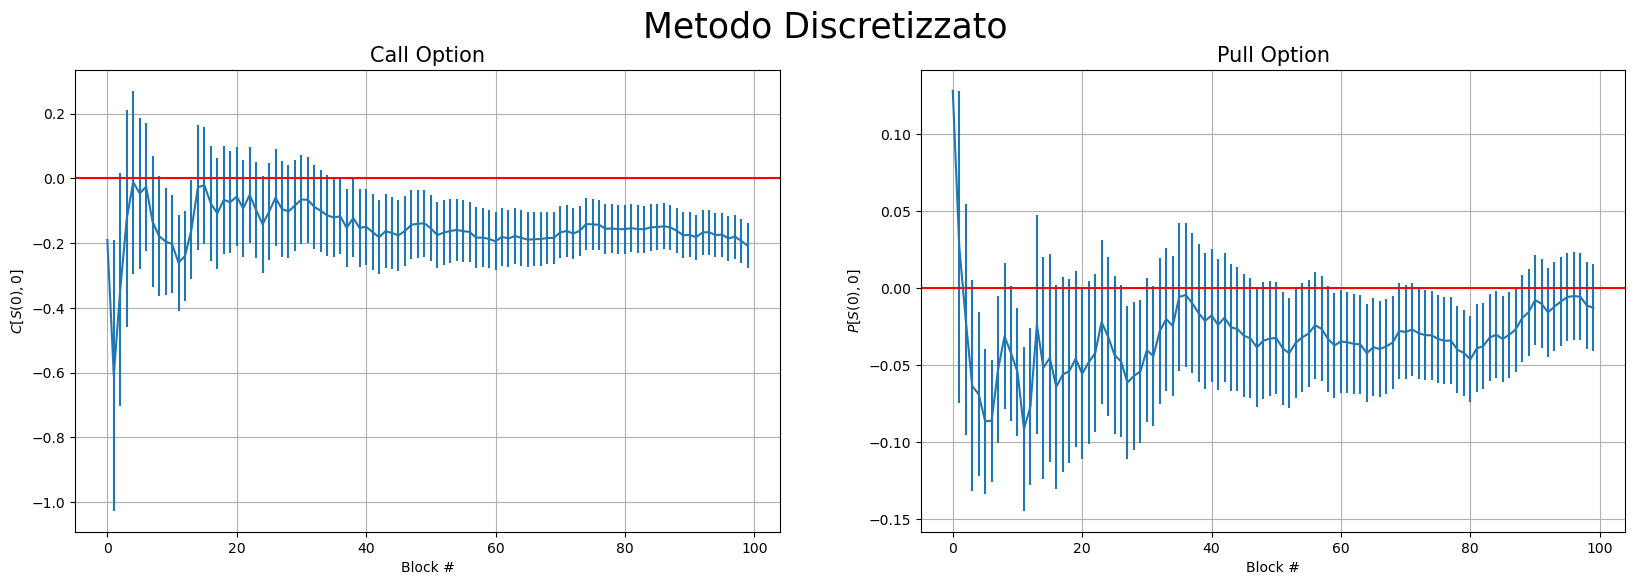

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.suptitle("Metodo Discretizzato", fontsize = 25)

x, sum_prog, err_prog = np.loadtxt("Exercise03-1/results/results_call_discrete.txt", usecols =(0,1,2), unpack = 'true')
axes[0].errorbar(x, sum_prog-14.97579, yerr = err_prog)
axes[0].set_xlabel('Block #')
axes[0].set_ylabel(r'$C[S(0),0]$')
axes[0].set_title("Call Option", fontsize=15)
axes[0].grid(True)
axes[0].axhline(y=0, color = 'r', linestyle = '-')

print("\033[1m" + "Call Option" + "\033[0m")
print("L'ultimo valore calcolato è " + str(sum_prog[-1])) 
print("Il relativo errore è " + str(err_prog[-1]))
sigma = abs(sum_prog[-1] - 14.97579)/err_prog[-1]
print("Il valore si trova a " + str(round(sigma,1)) + "\u03C3 dal valore atteso di 14.97579")

x, sum_prog, err_prog = np.loadtxt("Exercise03-1/results/results_pull_discrete.txt", usecols =(0,1,2), unpack = 'true')
axes[1].errorbar(x, sum_prog-5.4595, yerr = err_prog)
axes[1].set_xlabel('Block #')
axes[1].set_ylabel(r'$P[S(0),0]$')
axes[1].set_title("Pull Option", fontsize=15)
axes[1].grid(True)
axes[1].axhline(y=0, color = 'r', linestyle = '-')
plt.plot()

print("\033[1m" + "Pull Option" + "\033[0m")
print("L'ultimo valore calcolato è " + str(sum_prog[-1])) 
print("Il relativo errore è " + str(err_prog[-1]))
sigma = abs(sum_prog[-1] - 5.4595)/err_prog[-1]
print("Il valore si trova a " + str(round(sigma,1)) + "\u03C3 dal valore atteso di 5.4595")